# Visualization Tutorial for CAMEA
In this tutorial script data from the CAMEA multiplexing spectrometer at SINQ PSI will be loaded, converted and visualized using an interactive 3D visualization. All of this requires you to already have installed the software package MJOLNIR in you current environment. For instructions on this, see the provided tutorial overview.

## Script build up
This tutorial script is split into multiple parts where key functions are called one after the other. Some of these parts are supposed to be call multiple times, e.g. plotting of data, while others need only to be run once as an initialization of packages and loading of data, these will be signified with a comment in the top of the cell

## Nice to know
All plots generated directly through MJOLNIR shows the current mouse position in the relevant space through a tool tip in the matplotlib window. It is most likely lokated in the top right corner. If you cannot find it, try to expand the windows size.

## Check of package installation
First of all, a check of the packages needed for this tutorial is performed by simply importing MJOLNIR and printing the current version of the software. If this step succeeds all of MJOLNIR's dependencies have an overwhelming probability of also being installed correctly, e.g. Matplotlib or numpy.

In [1]:
import sys
sys.path.append(r'C:\Users\lass_j\Documents\Software\MJOLNIR')
# Run once
try:
    import MJOLNIR
    print('Your version is',MJOLNIR.__version__,'and MJOLNIR is correctly installed.')
except ImportError:
    print('MJOLNIR could not be found. Either the current environment is different from the one into which MJOLNIR was installed, or the MJOLNIR installation failed. Please contact the instructors :-/ .')

    

Your version is 1.3.0 and MJOLNIR is correctly installed.


## Helper functions
In this tutorial some functions need to be used which are not standard. These are simply given in the following cell

In [2]:
# Run once

### helper function to print the values of your fit
def PrintParameters(vals,err):
    if not np.all(np.isfinite(err)):
        for par in range(len(vals)):
            print('{} +- {}'.format(vals[par],err[par],[par]))
        return
    errdecimal = -(np.floor(np.log10(np.abs(err))).astype(int))
    
    errdecimal+= (np.floor(err*10**errdecimal)==1).astype(int)
    print(errdecimal)
    for par in range(len(vals)):
        print('{} +- {}'.format(np.round(vals[par],decimals=errdecimal[par]),np.round(err[par],decimals=errdecimal[par])))
        
def Gaussian(x,A,mu,sigma,B):
    return A*np.exp(-np.power(x-mu,2.0)/(2.0*sigma**2))+B
        

## Loading of data
We are now in a position where data can be loaded. One experiment usually results in multiple data files each containing a specific scan. These different data files are then to be loaded and visualized together. This is taken care of by the DataSet object. To load the data a list of file locations has to be provided to this DataSet object, but because we as scientists are lazy, MJOLNIR contains a function to generate these lists from the folder path and the file numbers.

In the cell below change the folder to be the correct for you. Running the snippet below might take some time as a lot of data files are loaded

In [3]:
# Run once
from MJOLNIR.Data import DataSet
from MJOLNIR._tools import fileListGenerator

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

# Load data files camea2021n00xxxx.hdf with the following numbers
numbers = '1371-1388'

##### CHANGE TO YOUR PATH TO THE DATA #############
folder = r'C:\Users\lass_j\Documents\CAMEATutorial\Data'       #
###################################################
dataFiles = fileListGenerator(numbers, folder, year = 2021)
print('DataFiles loaded: '+'\n'.join(dataFiles))

ds = DataSet.DataSet(dataFiles)


DataFiles loaded: C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001371.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001372.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001373.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001374.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001375.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001376.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001377.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001378.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001379.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001380.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001381.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001382.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001383.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001384.hdf
C:\Users\lass_j\Documents\CAMEATutorial\Data\camea2021n001

In [4]:
for df in ds:
    print(df.Ei,df.twotheta,df.A3[0],df.A3[-1])

[5.500007] [-46.996902] -130.0 -29.9999
[5.500007] [-51.0008] -29.9999 -130.0
[6.999954] [-46.999397] -138.0 -37.9999
[6.999954] [-51.0008] -37.9999 -138.0
[8.499966] [-39.9999] -140.0 -39.9999
[8.499966] [-43.9989] -39.9999 -140.0
[9.999946] [-36.0009] -145.0 -44.9999
[10.000035] [-39.9999] -44.9999 -145.0
[11.499852] [-36.0009] -148.0 -47.9999
[11.499852] [-39.9999] -47.9999 -148.0
[11.499852] [-36.0009] -147.0 -46.9999
[11.499852] [-39.9999] -46.9999 -147.0
[10.000035] [-36.0009] -144.0 -43.9999
[10.000035] [-39.9999] -43.9999 -144.0
[8.499966] [-39.9999] -139.0 -38.9999
[8.499966] [-43.9989] -38.9999 -139.0
[7.000005] [-46.999397] -137.0 -36.9999
[7.000005] [-51.0008] -36.9999 -38.9999


## Conversion of data files
As mentioned in the introductionary talk about CAMEA, the instrument has a variable resolution in the energy direction and can be tune after an experiment has been conducted. The energy resolution is chosen in the conversion step where you have a choice between 3 build in normalization tables. 

The difference between the three can be understood by looking at the definition of the active areas on the 1D detectors. Each 1D detector is split into 8 main areas corresponding to the eight analyzers located beneath. Because of the way the instrument has been build, the signal within each of these 8 areas is energy dependent. That is, in all of the active areas the end closest to the sample position measures neutrons with a final energy lower than at the opposite end. By splitting up such an active area into a variable number of section, different energy sensitivity is reached. 

For CAMEA the three normalization tables are currently 1, 3, and 8, signifying the number of segments each active area is split into. The choice of which to choose depends on the scattering intensity of the sample and the duration of the experiments as choosing e.g. binning 8 for a weak signal will split the few neutrons detected into many points. 

As a standard 8 prismatic pixels per active area is choosen, which, combined with the 104 detector tubes and 8 active areas per detector, resulting in a total of 6656 distinct pixel per scan step. 

The following conversion snippet might take a minute or two depending on computing power. 

In [5]:
# Try to run this and the following visualization for different binnings

ds.convertDataFile(binning=8)


## Visualization of the data
With the data both loaded and converted from detector pixels and neutron count into intensity in reciprocal space, it is now time to plot the data. As a first step it is most often a good idea to create an overview of the data. This can be done by using the interactive 3D viewing tool, Viewer3D, generated by calling the View3D method on the data set. What is performed is a binning in 3D into voxels (3D pixels) with constant width (dqx), depth (dqy), and height (dE). From this definition, it can be seen that the arguments the function needs are exactly the bin size in the three directions. 

Because each sample has their own unit cell size and thus also reciprocal lattice vectors, the size of the bins is to be specified in reciprocal Angstrom in the two momentum direction and milli electron V in energy. For the current data, suitable bin sizes are 0.04/Å, 0.04/Å, 0.08 meV as inserted below.

For the graph to be interactive, it is not possible to plot the figure inline, but rather the qt backend is to be used. (It is just fine if this makes no sense to you and you can simply enjoy that the  first line is given below)

The interactive window should pop up, and some different visualization directions can be chosen. As default intensity is plotted as function of momentum transfer along the two main direction in the scattering plane and for constant energy. Specifically, the lowest energy transfer is chosen.


| Key press| Effect |
| ----------- | ----------- |
| 0 | Intensity as function of Momentum and Energy transfer perpendicular to plane vector 1 |
| 1 | Intensity as function of Momentum and Energy transfer perpendicular to plane vector 2 |
| 2 | Intensity as function of Momentum for constant energy transfer |
| + or UpArrow | Increment step along constant axis |
| - or DownArrow | Decrement step along constant axis |
| s | Save current figure |
| End | Skip to the end of allowed stop in this projection |
| Home | Skip to the start of allowed stop in this projection |


By clicking on a point in the view, the corresponding reciprocal lattice point is written in the output!

## Extract intensity as function of HKLE for a given cut

In [6]:
dqx = 0.04
dqy = 0.04
dE  = 0.08

data,bins = ds.binData3D(dqx,dqy,dE)

from MJOLNIR._tools import invert

sample = ds[0].sample

# sample.UB converts directly from HKL to QxQyQz in the space of the instrument, BUT(!) the coordinate
# system of QxQyQz is not aligned so that we have nice HKL vectors along the X and Y axes. This is done 
# by RotMat. In addition, Qz is always 0, which is why I project it out with the 2x3 matrix.

# the invert function inverts a non-square matrix.

convertMatrix = invert(np.einsum('ij,jk,kl->il',sample.RotMat,np.array([[1.0,0.0,0.0],[0.0,1.0,0.0]]),sample.UB))
intensity = np.divide(data[0]*data[-1],data[1]*data[2])
HKLE = np.concatenate([np.einsum('ij,j...->i...',convertMatrix,bins[:2]),[bins[2]]])

# HKLE has the shape 4,X.shape
# That is, first index is H, K, L, E, while the latter three are the position in 3D space
# Intensity has the shape of X but one shorter in all directions. Bins are the corners
# while intensity is the center value


C:\Users\lass_j\AppData\Local\Temp\ipykernel_7896\3582549767.py:18: RuntimeWarning: invalid value encountered in true_divide
  intensity = np.divide(data[0]*data[-1],data[1]*data[2])


## Play around with the visualization

In [7]:
# Play around in this cell
%matplotlib qt

dqx = 0.04
dqy = 0.04
dE  = 0.08

grid = True # if this is True the reciprocal lattice is shown in the plot

V = ds.View3D(dqx,dqy,dE,grid=grid)

# The standard colour axis simply goes from the lowest to heighest intensity, but the following values makes the plot nicer
V.set_clim(0,0.01)



## Examine the data
As we want to be able to fit these magnon dispersions make a list of positions in reciprocal space where it would make sense to perform a cut. Think about the following points (the answer to some of these questions are not set in stone)

 - How many branches are in the data?
 - Which scattering plane has been measured?
 - Which positions are most important for determining the spin gap, the band width, and the steepness of the branch?
 - Should the cuts be performed along constant energy or at a constant Q point?
 - How many cuts are necessary?
 - How long should the cuts be and what happens if they are too long/short?
 
We are now in a position to start performing 1D cuts through the data. In the following snippet two cuts are performed: 
 - a constant E cut through the dispersion between (-1,0,0) and (-2,0,0) at 3.7 meV \pm 0.1 meV
 - a constant Q cut at (-1.15,0,0.15) between 0 meV and 6 meV

In [8]:
# Play around in this cell

# Define the Q points for constant energy cut
Q1 = np.array([-1.0,0.0,0]) # RLU
Q2 = np.array([-.5,0.0,0]) # RLU

# Define energy range to integrate over
Estart = 3.9 # meV
Estop = 4.1 # meV

# Define perpendicular width of cut, i.e. how wide the cut is to be in the Q plane
width = 0.05 # 1/Å

# Define the size of the bins along the cut direction
minPixel = 0.01 # 1/Å

# The flag 'extend' sets whether or not the cut is to be extended in both directions to include all data
# The flag 'constantBins' decides if the bins used in the cut all have the same size. If not, an adaptive binning method is used
ax1D,data1D,_ = ds.plotCut1D(q1=Q1,q2=Q2,width=width,minPixel=minPixel,Emin=Estart,Emax=Estop,extend=False,constantBins=True)

# ax1D contains the matplotlib axis element into which the plot has been generated
# data1D is a pandas dataframe containing the data of the cut
# The last return value is bins, which contains a list of bin positions both in energy and the two q directions.
# As it is not needed in this tutorial it has been named '_' which signifies an unused variable

# If the plot is to be recreated (later used to overplot with our fit), the following code can be used
Intensity = data1D['Int']
# The error is calculated using the Gaussian approximation and normalized to monitor and instrument sensitivity
Error = data1D['Int_err']
H = data1D['H']


fig1DCut,ax1DCut = plt.subplots()
ax1DCut.errorbar(H,Intensity,yerr=Error,fmt='.')
ax1DCut.set_xlabel('H [RLU]')
ax1DCut.set_ylabel('Intensity [arb]')


Text(0, 0.5, 'Intensity [arb]')

In [9]:
data1D

,Qx,Qy,H,K,L,Energy,intensity,Monitor,Normalization,BinCount,Int,Int_err,BinDistance
0,0.965433,0.841618,-0.993319,1.918646e-35,-2.153623e-08,4.0,0.0,3000000.0,0.035531,15.0,0.000000,0.000000,0.013361
1,0.957895,0.835047,-0.985564,1.903666e-35,-2.136808e-08,4.0,3.0,2800000.0,0.029103,14.0,0.000515,0.000298,0.028872
2,0.950357,0.828475,-0.977808,1.888685e-35,-2.119993e-08,4.0,2.0,5600000.0,0.050022,28.0,0.000200,0.000141,0.044384
3,0.942819,0.821904,-0.970053,1.873705e-35,-2.103178e-08,4.0,3.0,5600000.0,0.060355,28.0,0.000249,0.000143,0.059895
4,0.935281,0.815333,-0.962297,1.858725e-35,-2.086363e-08,4.0,5.0,5200000.0,0.043641,26.0,0.000573,0.000256,0.075406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.520697,0.453919,-0.535738,1.034804e-35,-1.161537e-08,4.0,5.0,10800000.0,0.073636,54.0,0.000340,0.000152,0.928524
60,0.513159,0.447348,-0.527982,1.019824e-35,-1.144722e-08,4.0,3.0,9400000.0,0.089070,47.0,0.000168,0.000097,0.944036
61,0.505622,0.440777,-0.520227,1.004844e-35,-1.127907e-08,4.0,0.0,7600000.0,0.058296,38.0,0.000000,0.000000,0.959547
62,0.498084,0.434205,-0.512471,9.898633e-36,-1.111092e-08,4.0,4.0,8800000.0,0.092436,44.0,0.000216,0.000108,0.975058


In [10]:
V.Data.shape

(57, 95, 102)

Text(0, 0.5, 'Intensity [arb]')

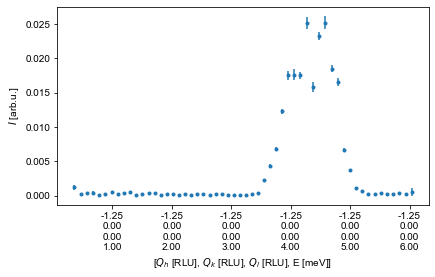

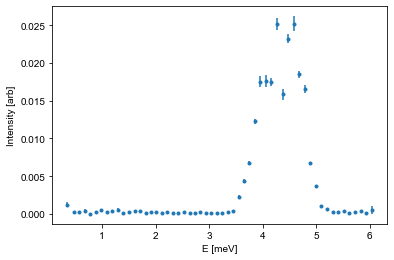

In [11]:
%matplotlib inline
# Play around in this cell

# Definition of position and energy range for constant Q cut
Q = np.array([-1.25,0,0]) # RLU

Emin = 0 # meV
Emax = 6 # meV

# If a point lies within the width of Q it is used in the cut
width = 0.05 # 1/Å

# The bin size along the cut
minPixel = 0.1 # meV

ax1D1,data1DE,_ = ds.plotCut1DE(Emin,Emax,q=Q,width=width,minPixel=minPixel)

# Just as above the return values are the matplotlib axis, the pandas data frame containing the data and binning

# Recreating this plot is again performed as
Intensity = data1DE['Int']
# The error is calculated using the Gaussian approximation and normalized to monitor and instrument sensitivity
Error = data1DE['Int_err']
E = data1DE['Energy']


fig1DECut,ax1DECut = plt.subplots()
ax1DECut.errorbar(E,Intensity,yerr=Error,fmt='.')
ax1DECut.set_xlabel('E [meV]')
ax1DECut.set_ylabel('Intensity [arb]')


## The MnF2 dispersion theory ## 
When you have optained a list of energies as a function of Q positions, it is time to fit the actual dispersion. This is done by the same method as above, but with a different fitting function, namely the one for MnF2


$$\hbar \omega(\vec{Q}) = \sqrt{\left(\hbar \omega_2 + \zeta(\vec{Q})\right)^2- \left(\hbar \omega_2 \gamma(\vec{Q})\right)^2}$$,
where
$$\zeta(\vec{Q}) = D+2\hbar \omega_1 \sin^2\left(\frac{q_z c}{2} \right)$$
$$\gamma(\vec{Q})  = \cos\left(\frac{Q_Ha}{2} \right)\cos\left(\frac{Q_Ka}{2} \right)\cos\left(\frac{Q_Lc}{2} \right)$$

and $\hbar\omega_i=2Sz_iJ_i$, $z_1=2$ and $z_2=8$.

By assuming that the input vector $\vec{Q}$ is a 3xN array with H, K, and L in the first dimension and points in the second, the dispersion is defined:


In [12]:
# run once

S = 5/2
z1 = 2
z2 = 8


def MnF2(Q,J1,J2,D):
    return np.sqrt(np.power(2*S*z2*J2+D+2*z1*S*J1*np.sin(Q[2,:]*np.pi)**2,2.0)-
            np.power(2*S*z2*J2*np.cos(Q[0]*np.pi)*np.cos(Q[1]*np.pi)*np.cos(Q[2]*np.pi),2.0))

## Play around with the theory prediction

With the formula for the dispersion define, try to plot this as function of Q for different values of J1, J2, and D, and along the different Q-vectors. An example is seen below for a good guess of formula parameters

(0.5, 7.0)

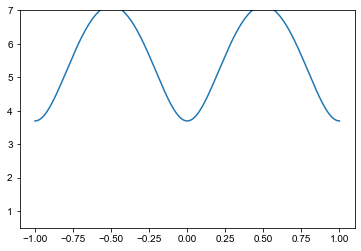

In [13]:
# Run multiple times

theoryFig,theoryAx = plt.subplots()

p0 = np.array([0.124,0.115,1.3])

Q = np.array([-np.ones(201),np.zeros(201),np.linspace(-1,1,201)])
E = MnF2(Q,*p0)

theoryAx.plot(Q[2],E,label='Theory')
theoryAx.set_ylim(0.5,7)


## Performing multiple cuts
At some point, performing more than just one cut is adventageous and the plots are no longer needed. For both the plotCut1D and the plotCut1DE, the corresponding functions without the plotting are caled cut1D and cut1DE, and they take the same inputs. By creating a for loop over the cut position(s), multiple cuts can be performed at once. An example for performing constant q cuts along energy with different starting positions in Q is given below

In [14]:
# Play around in this cell

dataFrames = [] # Holder for data

QList = np.array([[-1.0,0.0,-0.5],
                  [-1.0,0.0,-0.4],
                  [-1.0,0.0,-0.3],
                  [-1.0,0.0,-0.2],
                  [-1.0,0.0,-0.1],
                  [-1.0,0.0, 0.0],
                  [-1.0,0.0, 0.1],
                  [-1.0,0.0, 0.2],
                  [-1.0,0.0, 0.3],
                  [-1.0,0.0, 0.4],
                  [-1.0,0.0, 0.5],
                  [-1.0,0.0, 0.6],
                  [-0.9,0.0, 0.0],
                  [-0.8,0.0, 0.0],
                  [-1.1,0.0, 0.0],
                  [-1.2,0.0, 0.0],
                  [-1.3,0.0, 0.0],
                 ])

Estart = 0.7
Estop = 7.5

width = 0.05 # 1/Å
minPixel = 0.1 # 1/Å


for QPoint in QList:
    dat,_ = ds.cut1DE(q=QPoint,E1=Estart,E2=Estop,width=width,minPixel=minPixel,constantBins=True)
    dataFrames.append(dat)
    



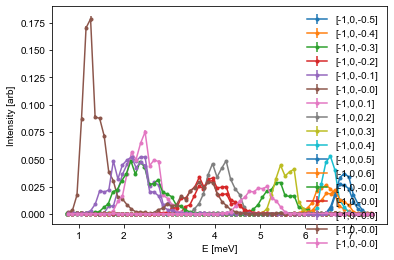

In [15]:
# Play around in this cell

combiFig, combiAxis = plt.subplots()

for d in dataFrames:
    Intensity = d['Int']
    # The error is calculated using the Gaussian approximation and normalized to monitor and instrument sensitivity
    Error = d['Int_err']
    L = d['L']
    E = d['Energy']
    combiAxis.errorbar(E,Intensity,yerr=Error,fmt='.-', label='[-1,0,{:.1f}]'.format(np.mean(L)))
    
    
combiAxis.set_xlabel('E [meV]')
combiAxis.set_ylabel('Intensity [arb]')
combiAxis.legend(frameon=False)


## Fitting the peaks
Next up is to find the position of the dispersion by fitting. This is done by first defining a suitable fitting function and then to optimize the fitting parameters. This can be done using many different optimization algorithms and packages, but here we will suggest to use the scipy.optimize.curve_fit function.

To fit using this, a fitting function is needed together with the corresponding x and y values, and a starting guess on parameters. In inelastic neutron scattering it is common practive to utilize Gaussians for these types of fits:

$$f(x) = Ae^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}+B $$

Here $A$ is the aplitude, $\mu$ is the center point, $\sigma$ is the width, and $B$ is the background. The snippet below shows how to fit such a function to the last cut from above, and it is your tasks to adapt this code to fit all of the cuts you performed above.

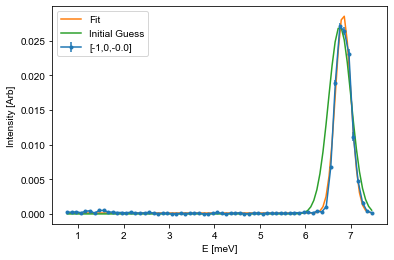

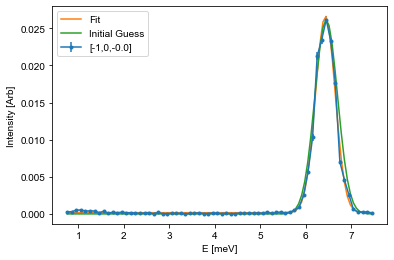

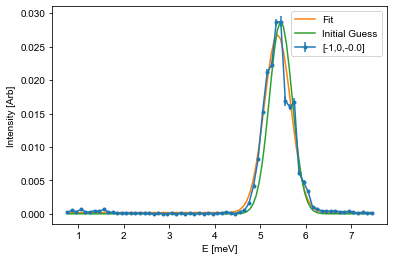

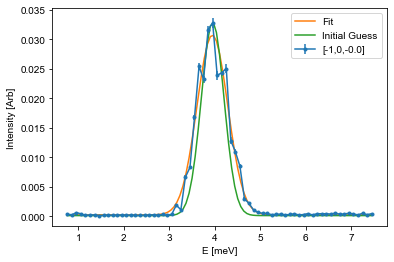

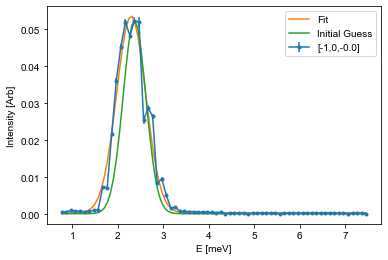

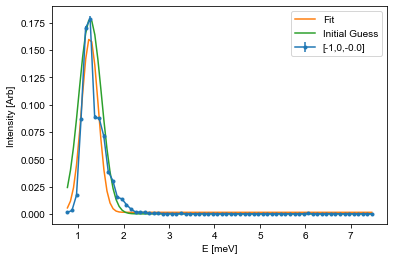

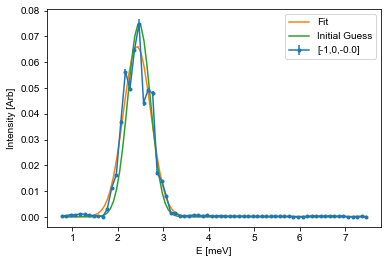

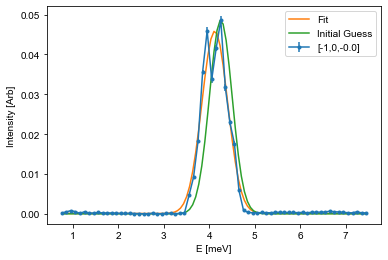

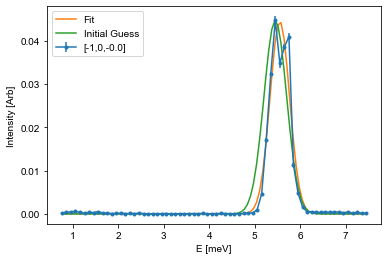

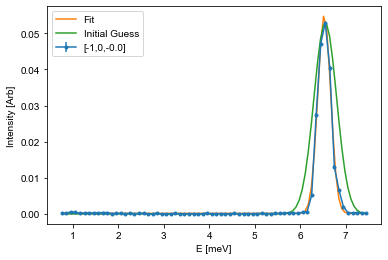

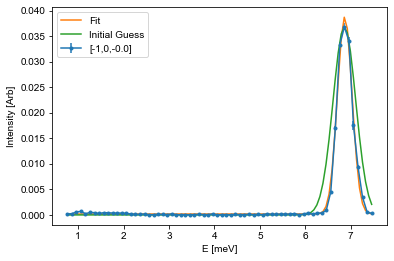

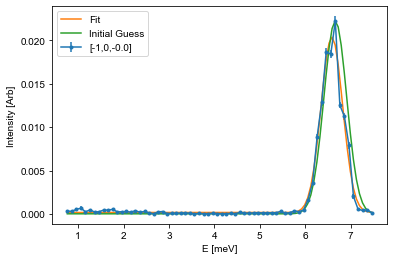

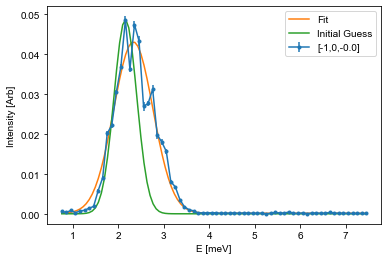

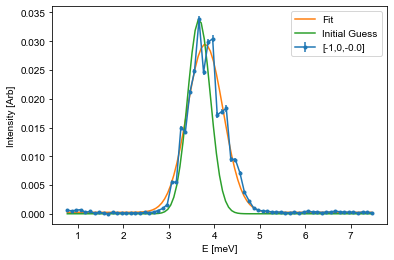

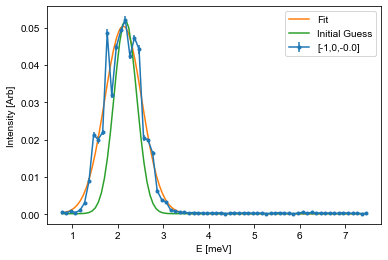

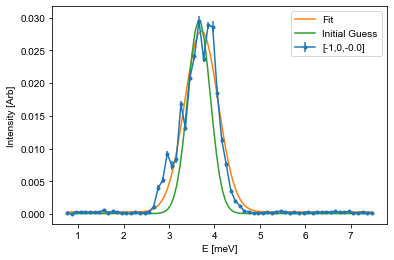

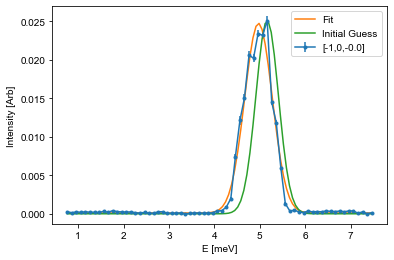

In [16]:
# Run multiple times for different dataframes or make it into a loop


from scipy.optimize import curve_fit
fitE = []
errE = []
for i in range(len(dataFrames)):
    fitFig,fitAx = plt.subplots()

    Intensity = dataFrames[i]['Int']
    Error = dataFrames[i]['Int_err']
    E = dataFrames[i]['Energy']


    # The guess follows the input list from the function. Amplitude and center position is found from the maximal intensity position
    centerId = np.argmax(Intensity) # Index of maximal positin
    mu_guess = E[centerId]
    A_guess = Intensity[centerId]
    sigma_guess = 0.25 # Pure gut feel guess
    B_guess = np.min(Intensity)
    guess = [A_guess,mu_guess,sigma_guess,B_guess]

    # Call the optimization function, which returns the optimal values (fit) and the correlation 
    # matrix (Var_mat) from which the actual error estiamte can be found
    fit,Var_mat = curve_fit(Gaussian,E,Intensity,p0=guess)

    # For simplicity, it is assumed that the errors are uncorrelated and thus equal to the square root of the diagonal
    fit_err = np.sqrt(np.diag(Var_mat))

    # Create a variable against which the fit is plotted
    X = np.linspace(np.min(E),np.max(E),101)
    Y = Gaussian(X,*fit) # Notice: using the * operator here unpacks all of the values so that you don't have to write them by hand
    Init = Gaussian(X,*guess)

    # Plot data
    fitAx.errorbar(E,Intensity,yerr=Error,fmt='.-', label='[-1,0,{:.1f}]'.format(np.mean(L)))
    # Plot fit
    fitAx.plot(X,Y,label='Fit')
    # If the fit does not look cirrect, plot the initial guess as the start parameters might be off
    fitAx.plot(X,Init,label='Initial Guess')

    fitAx.set_xlabel('E [meV]')
    fitAx.set_ylabel('Intensity [Arb]')
    fitAx.legend()


    ## Use the helper function given above
    #PrintParameters(fit,fit_err)
    fitE.append(fit[1])
    errE.append(fit_err[1])

## Setting up the fitting to the dispersion
Whith a list of energy vs Q position, we can now fit the actual dispersion:

In [17]:
# Play around and change the two arrays below to your actual fitted values and positions

FittedE = np.asarray(fitE)
ErrorE = np.asarray(errE)

Q = np.asarray(QList)#np.array([[-1.39,0.0,0.0],
    #         [-1.36,0.0,0.0],
    #         [-1.34,0.0,0.0]])


p0 = np.array([0.028,0.152,0.091])

vals,errors = curve_fit(MnF2,Q.T,FittedE,sigma=ErrorE,p0=p0)

err = np.sqrt(np.diag(errors))
PrintParameters(vals,err)

[3 3 3]
0.074 +- 0.01
0.15 +- 0.003
0.117 +- 0.019


For a good fit the more points, the better. What to consider is to add the uncertainties of the energy positions (if you made constant Q-point cuts) to the fitting routine. Lastly, try to plot the fitted dispersion on to of your data. For this, it can be adventageous to perform a QE cut, i.e. a cut for multiple energies between two Q points as shown below

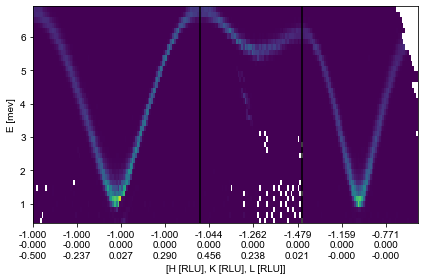

In [18]:
# Play around if you get to it!
%matplotlib inline

Q1 = np.array([-1.0,0.0,-0.5])
Q2 = np.array([-1.0,0.0, 0.5])
Q3 = np.array([-1.5,0.0, 0.0])
Q4 = np.array([-0.5,0.0, 0.0])

Energies = np.linspace(0.5,7,41)

width = 0.05
minPixel = 0.02

ax_QECut,data,bins = ds.plotCutQELine(QPoints=[Q1,Q2,Q3,Q4],EnergyBins=Energies,width=width,minPixel=minPixel,constantBins = True,plotSeperator =True)
ax_QECut.set_clim(0,0.25)

## Overplotting fit and data
The way this plot works is to plot the intensity as function of energy and distance in 1/Å from the start position. This is due to the possibility of plotting multiple cuts in the same plot. This also results in it being a little difficult to plot the theory directly on top. However, this can be achieved as shown below.

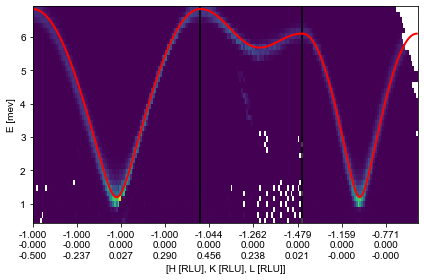

In [19]:
Q = []
# Extract the positions into the form [[[h00,k00,l00,0],[h10,k10,l10,0]...],[[h01,k01,l01,1],[h11,k11,l11,1]...]]
for I,G in enumerate(data):
    # Yes I know... this is not the most beautiful ever...
    q = np.array(list(G.groupby('Energy'))[0][1][['H','K','L']])
    Q.append(np.insert(q,3,np.full_like(q[:,1],I),axis=1))
    
    
import copy
QforPosition = copy.deepcopy(Q)
# Generate the correct positioning on the plot
positions = [ax_QECut.calculatePositionInv(q) for q in QforPosition]

# Calculate the prediction of the energy for the Q values
# Here we use 'vals' that you have fitted earlier, otherwise use p0
Etheory = [MnF2(q.T[:3],*vals) for q in Q]


# Plot the prediction on top of the data
for pos,Ecalc in zip(positions,Etheory):
    ax_QECut.plot(pos,Ecalc,color='r',linewidth=2)

ax_QECut.get_figure()